In [27]:
import easyocr
import re
import cv2
from tqdm.notebook import tqdm
from datetime import datetime
from tools.frame_detector import FrameDetector
from matplotlib import pyplot as plt


In [6]:
video_name = "/home/tzvigr/chaser/test/samples/sample_episode.mp4"
vidcap = cv2.VideoCapture(video_name)
success, image = vidcap.read()
fps = vidcap.get(cv2.CAP_PROP_FPS)
h, w, _ = image.shape
count = 0
frames = []

In [10]:
# get some frames as np array
# pbar = tqdm(total=int(vidcap.get(cv2.CAP_PROP_FRAME_COUNT)))
for count in tqdm(range(int(vidcap.get(cv2.CAP_PROP_FRAME_COUNT)))):
    if not success:
        break
    if count % (2 * fps) == 0:  # every 2 seconds
        success, image = vidcap.read()
        if image is not None:
            image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            frames.append(image[h//2:h, w//2:w])
    else:
        ret = vidcap.grab()
    # count += 1
#     pbar.update(1)
# pbar.close()

  0%|          | 0/77932 [00:00<?, ?it/s]

In [ ]:
f = [frames[88], frames[405], frames[768], frames[1045]]

reader = easyocr.Reader(['en'], gpu=True)
for i, frame in enumerate(f):
    result = reader.readtext(frame)
    for j, (rect, text, confidence) in enumerate(result):
        print(f"{i=}",f"{j=}",f"{text=}", f"{confidence=}")
    # for (rect, text, confidence) in result:
    #     print(text)
    #     if re.match('1.00|1:00|2:00|2.00', text):
    #         print(True)

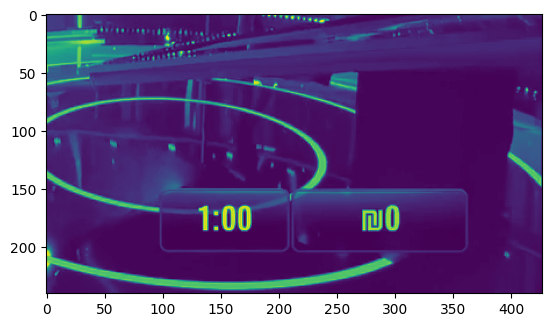

In [38]:
# show frames
plt.imshow(f[1])
plt.show()

In [28]:
detector = FrameDetector(frames)
detector.detect()
print(f"{detector.get_best_results()=}")

100%|██████████| 1559/1559 [01:45<00:00, 14.75it/s]

self.detectionTime=105.68090891838074
self.found=[(1470, '2.00', 0.9766212701797485), (1373, '2.00', 0.9765257239341736), (1472, '2.00', 0.9764188528060913), (1471, '2.00', 0.9757879972457886), (1404, '1:00', 0.5260469913482666)]
detector.get_best_results()=[(1470, '2.00'), (1404, '1:00')]


In [ ]:
vidcap.release()